In [98]:
import seaborn as sns

data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [100]:
# 중복열 제거
prep_data = data.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'])

In [101]:
# 결측값이 많은 열 제거
prep_data.drop('deck', axis=1, inplace=True)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,True
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


In [102]:
# 결측값 제거 후 인덱스 재정렬
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,False
708,0,2,male,27.0,0,0,13.0000,S,True
709,1,1,female,19.0,0,0,30.0000,S,True
710,1,1,male,26.0,0,0,30.0000,C,True


In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

prep_data["sex"] = le.fit_transform(prep_data["sex"])
prep_data["alone"] = le.fit_transform(prep_data["alone"])
prep_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,0
708,0,2,1,27.0,0,0,13.000,S,1
709,1,1,0,19.0,0,0,30.000,S,1
710,1,1,1,26.0,0,0,30.000,C,1
711,0,3,1,32.0,0,0,7.750,Q,1


In [104]:
le.classes_
# array(['female', 'male'], dtype=object)

array([False,  True])

In [105]:
# embarked 열은 문자열이므로 숫자 자료형으로 변환
from sklearn.preprocessing import OneHotEncoder

embarked_unique = prep_data.embarked.unique()

print("embarked열의 고유한 값:\n", embarked_unique)
# embarked열의 고유한 값:
#  ['S' 'C' 'Q']

embarked열의 고유한 값:
 ['S' 'C' 'Q']


In [106]:
ohe = OneHotEncoder()

# fancy indexing은 DataFrame을 반환
embarked_df = prep_data[["embarked"]]

# OneHotExcodersms DataFrame만 입력 가능
ohe.fit(embarked_df)

embarked_ohe = ohe.transform(embarked_df)
embarked_ohe

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [107]:
# OneHotEncoding 결과를 numpy 배열로 변환한 후, 다시 DataFrame으로 변환한다.
import pandas as pd

embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique)
embarked_df.sample(5)

,S,C,Q
416,0.0,1.0,0.0
89,0.0,0.0,1.0
647,0.0,0.0,1.0
37,0.0,0.0,1.0
426,1.0,0.0,0.0


In [108]:
# 인코딩한 DataFrame을 학습 데이터 DataFrame에 합쳐주고 기존 embarked 열은 삭제한다.
prep_data = pd.concat([prep_data, embarked_df], axis=1)

prep_data = prep_data.drop("embarked", axis=1)

prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,0,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,1,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,1,1.0,0.0,0.0


In [109]:
# 성능 검증을 위해서 트레인셋과 테스트셋으로 분리핚다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  prep_data.iloc[:, 1:],
  prep_data.iloc[:, 0],
  random_state=42
)

# `Class DecisionTreeClassifier`의 `Parameters`
- `criterion` : `gini`와 `entropy` 총 두 가지가 있으며, 기본 값은 `gini`이다.<br><br>
    - `gini`는 `entropy`보다 연산속도는 빠르지만 한쪽으로 편향된 결과를 낼 수 있다.<br><br>
    - `entropy`는 `gini`에 비해 조금 더 균형 잡힌 `model`을 만들 수 있다고 한다.<br><br>
- `max_depth` : `Decision Tree`의 최대 깊이 제한.<br><br>
    - `default=None`.<br><br>
    - 클수록 정확하게 (과대적합) 작을수록 가지치기 (과대적합 방지)<br><br>
- `min_samples_split` : 노드에서 가지를 분리할 때 필요한 최소 `sample` 개수에 대한 제한.<br><br>
    - `default = 2`.<br><br>
    - 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)<br><br>
- `min_samples_leaf` : 한 노드에서 가지고 있어야 할 최소 `sample` 개수에 대한 제한.<br><br>
    - `default = 1`.<br><br>
    - 클수록 가지치기 (과대적합 방지) 작을 수록 정확하게 (과대적합)<br><br>
    - `int`일 경우, 주어진 값을 그대로 사용.<br><br>
    - `float`일 경우, 0에서 1사이의 값을 줄 수 있으며 `ceil`(전체 데이터 수 * `min_samples_leaf`)의 값을 사용<br><br>
- `max_features` :  최상의 분할을 찾기 위한 `feature`의 수.<br><br>
    - `default=None`<br><br>
    - `int`일 경우, 주어진 값을 그대로 사용한다.<br><br>
    - `float`일 경우, `int`(`max_features` * 총 변수 개수)를 사용한다.<br><br>
    - `None`일 경우, 총 변수 개수를 사용한다.<br><br>
- `max_leaf_nodes` : `int` or `None`, `optional` (`default=None`).<br><br>
    - 최대 몇개 잎 노드가 만들어 질때 까지 `split`(하위 (잎) 노드로 분리) 할 것이냐를 결정한다.<br><br>
    - 클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.<br><br>
- `min_impurity_decrease` : 분할로 얻어질 분순도 감소량 지정<br><br>
- `min_weight_fraction_leaf`: `min_samples_leaf`와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율<br><br>
- `splitter` : 각 노드에서 분할을 선택하는 데 사용되는 전략 (`default : best`)<br><br>
- `class_weight` : 클래스 가중치<br><br>
- `presort` : 데이터 정렬 필요 여부<br><br>

In [110]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

# 하이퍼 파라미터, 가지치기
model = DecisionTreeClassifier(max_depth=2) # max_depth : 트리의 최대 깊이 (level의 깊이 수준)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [111]:
# 모델 예측 및 평가
score = model.score(X_test, y_test)

print("정확도 :", score)
# 정확도 : 0.7584269662921348

정확도 : 0.7584269662921348


In [112]:
import numpy as np
import matplotlib.pyplot as plt

print("피처 중요도:\n", model.feature_importances_)
# 피처 중요도:
#  [0.29899614 0.70100386 0.         0.         0.         0.
#  0.         0.         0.         0.        ]

피처 중요도:
 [0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.         0.        ]


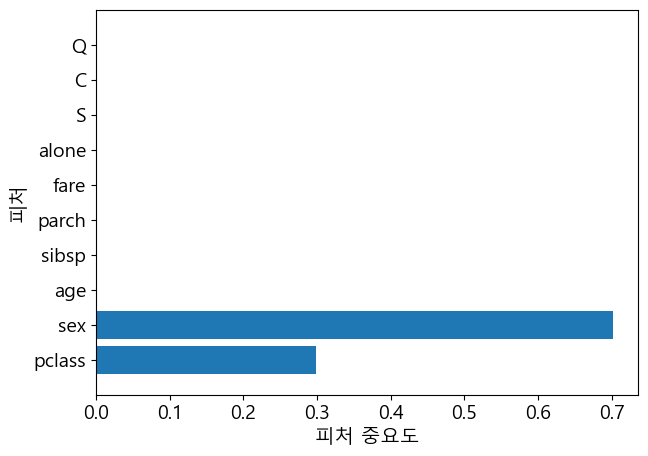

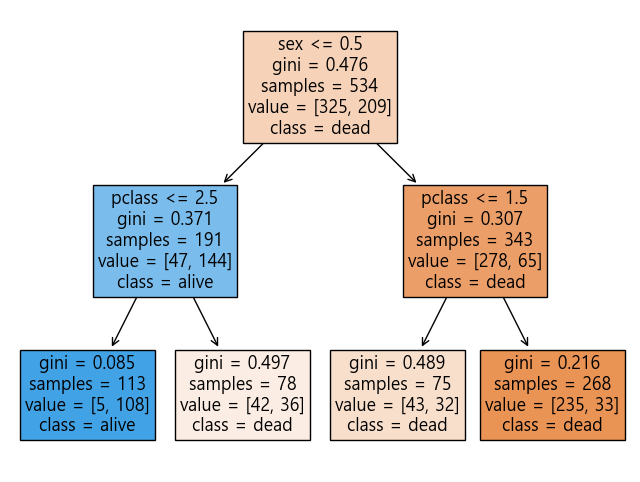

In [113]:
plt.rcParams["font.family"] = 'Malgun Gothic'
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), model.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)

# 모델 그리기 : 의사결정나무를 시각화하는 기능을 자체적으로 지원한다
from sklearn.tree import plot_tree

label_val = {0: 'dead', 1: 'alive'}

plt.figure(figsize=(8,6))
plot_tree(
  model.fit(X_train, y_train),
  feature_names=X_train.columns,
  class_names=label_val,
  filled=True
)
plt.show()

# NaN 설명

In [114]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 4), columns=['C1', 'C2', 'C3', 'C4'])

df.loc[[0, 1], 'C1'] = None
df.loc[2, 'C2'] = np.nan
df.loc[2, 'C3'] = np.nan

df

,C1,C2,C3,C4
0,NaN,0.007472,-0.197407,-0.023873
1,NaN,1.474131,-0.463419,-0.280853
2,-0.789806,NaN,NaN,-0.387537
3,0.709250,-0.454100,-0.840678,1.242543
4,1.485945,0.774112,-0.097141,0.906182


In [115]:
df_drop_row = df.dropna(axis=0)
df_drop_row

,C1,C2,C3,C4
3,0.709250,-0.454100,-0.840678,1.242543
4,1.485945,0.774112,-0.097141,0.906182


In [116]:
df_drop_col = df.dropna(axis=1)
df_drop_col

,C4
0,-0.023873
1,-0.280853
2,-0.387537
3,1.242543
4,0.906182


In [117]:
df_drop_col_thresh = df.dropna(axis=1, thresh=4)
# thresh=4 : 해당 칼럼에서 nan이 하는 값이 존재하는 수가 4개여야지만 실행시킨다는 의미
df_drop_col_thresh

,C2,C3,C4
0,0.007472,-0.197407,-0.023873
1,1.474131,-0.463419,-0.280853
2,NaN,NaN,-0.387537
3,-0.454100,-0.840678,1.242543
4,0.774112,-0.097141,0.906182


# 서울 지역 분류 실습 추가 예제
- district: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)
- dong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)
- longitude: 경도
- latitude: 위도
- label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭


In [118]:
import pandas as pd
import numpy as np
# sklearn 모델의 동일핚 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [119]:
district_dict_list = [
  {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
  {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
  {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
  {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
  {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
  {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
  {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
  {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
  {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
  {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
  {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
  {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
  {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
  {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
  {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
  {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
  {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
  {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
  {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
  {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [120]:
dong_dict_list = [
 {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
 {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
 {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
 {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
 {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
 {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
 {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
 {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
 {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
 {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
 {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
 {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
 {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
 {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
 {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
 {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
 {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
 {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
 {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
 {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [121]:
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [122]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [123]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [124]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [125]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'district visualization in 2d plane')

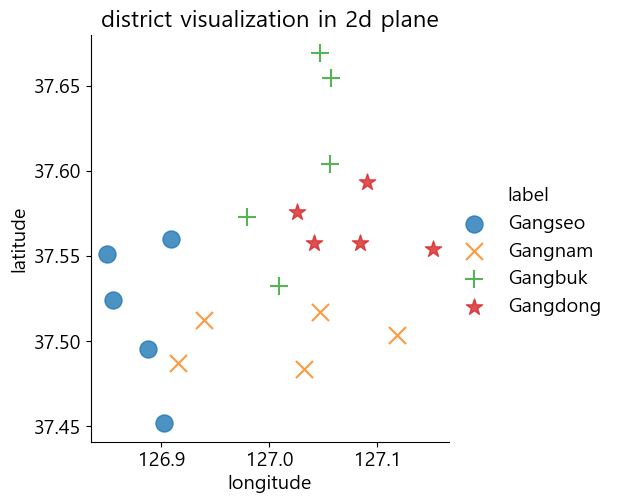

In [127]:
sns.lmplot(
  x='longitude',
  y='latitude',
  data=train_df,
  fit_reg=False, # x 축, y 축, 데이터, 라인 없음
  scatter_kws={"s": 150}, # 좌표 상의 점의 크기
  markers=["o", "x", "+", "*"],
  hue="label"
)

plt.title('district visualization in 2d plane')

In [128]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace = True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [129]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [130]:
def display_decision_surface(clf, X, y):
 # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
  x_min = X.longitude.min() - 0.01
  x_max = X.longitude.max() + 0.01
  y_min = X.latitude.min() - 0.01
  y_max = X.latitude.max() + 0.01

  n_classes = len(le.classes_)

  plot_colors = "rywb"
  plot_step = 0.001

  xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
  )

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)

    plt.scatter(
      X.loc[idx].longitude,
      X.loc[idx].latitude,
      c=color,
      label=le.classes_[i],
      cmap=plt.cm.RdYlBu,
      edgecolor='black',
      s=200
    )

  plt.title("Decision surface of a decision tree",fontsize=16)

  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

  plt.xlabel('longitude',fontsize=16)
  plt.ylabel('latitude',fontsize=16)

  plt.rcParams["figure.figsize"] = [7,5]
  plt.rcParams["font.size"] = 14
  plt.rcParams["xtick.labelsize"] = 14
  plt.rcParams["ytick.labelsize"] = 14

  plt.show()

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


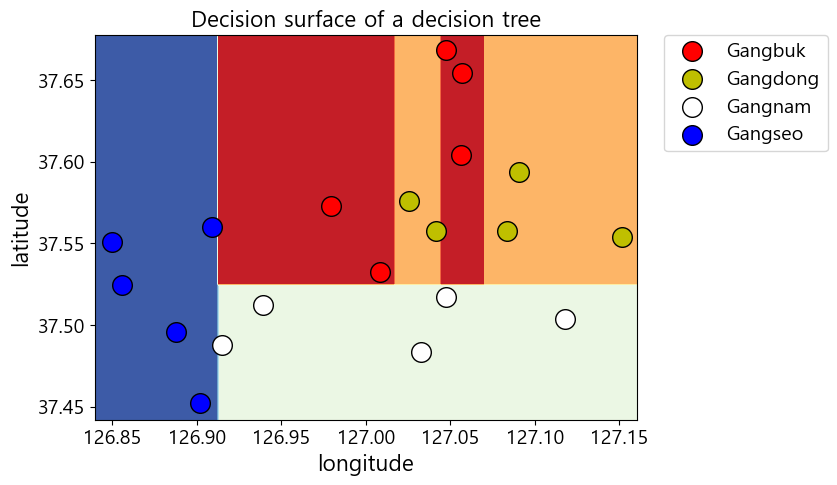

In [131]:
le = preprocessing.LabelEncoder()

y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

display_decision_surface(clf,X_train, y_encoded)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


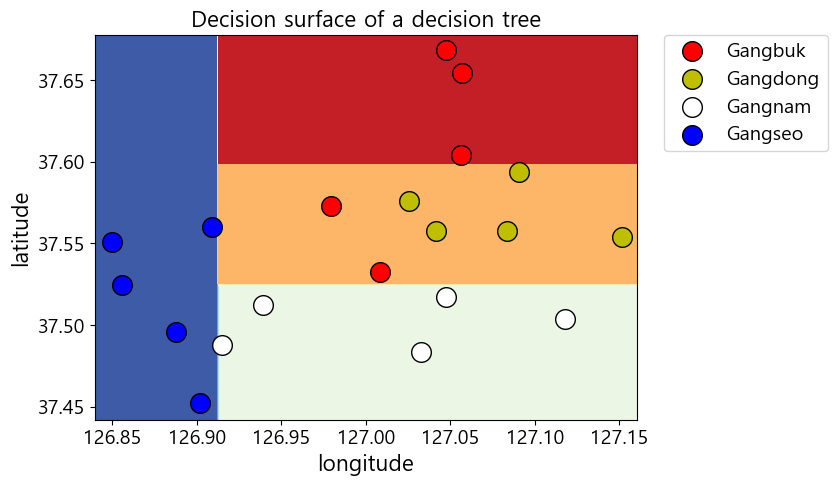

In [132]:
clf = tree.DecisionTreeClassifier(
  max_depth=3,
  min_samples_split=3,
  min_samples_leaf=3,
  random_state=5
).fit(X_train, y_encoded.ravel())

display_decision_surface(clf,X_train, y_encoded)

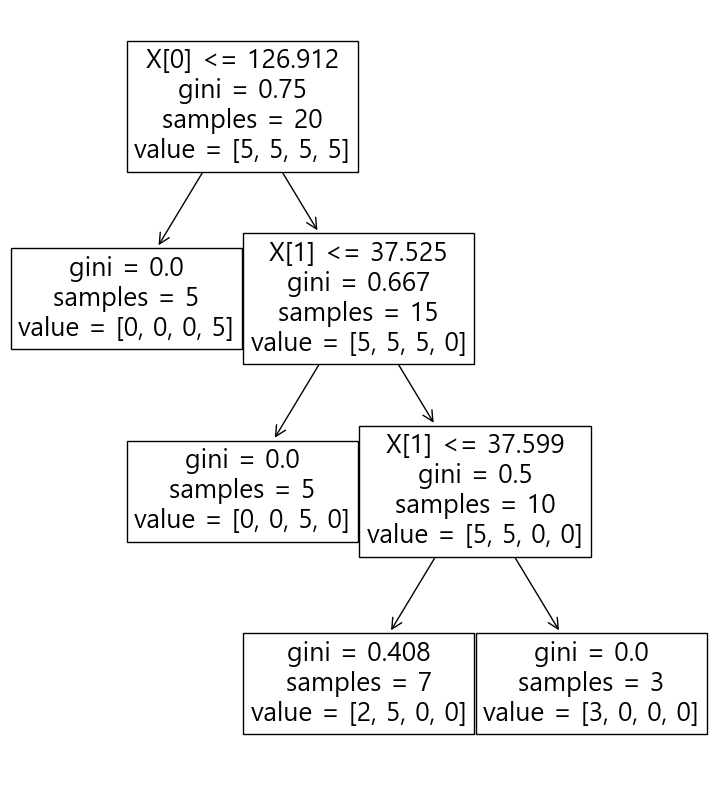

In [136]:
from sklearn.tree import plot_tree

label_val = {0: 'Gangbuk', 1: 'Gangdong', 2: 'Gangseo'}

plt.figure(figsize=(9,10))

plot_tree(
  clf.fit(X_train, y_encoded)
)

plt.show()

# Random Forest

In [137]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

iris = datasets.load_iris()

print('아이리스 종류 :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginica]')
print('데어터 수 :', len(iris.data))
print('데이터 열 이름 :', iris.feature_names)

아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데어터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [138]:
data = pd.DataFrame(
  {
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
  }
)

data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [148]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [149]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [150]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

     sepal length  sepal width  petal length  petal width
85            6.0          3.4           4.5          1.6
120           6.9          3.2           5.7          2.3
10            5.4          3.7           1.5          0.2
112           6.8          3.0           5.5          2.1
68            6.2          2.2           4.5          1.5
..            ...          ...           ...          ...
141           6.9          3.1           5.1          2.3
133           6.3          2.8           5.1          1.5
64            5.6          2.9           3.6          1.3
81            5.5          2.4           3.7          1.0
128           6.4          2.8           5.6          2.1

[105 rows x 4 columns]
     sepal length  sepal width  petal length  petal width
27            5.2          3.5           1.5          0.2
92            5.8          2.6           4.0          1.2
117           7.7          3.8           6.7          2.2
23            5.1          3.3           1.7    

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

estimator = RandomForestClassifier()

cv = KFold(n_splits=10, random_state=42, shuffle=True)

parameters = {
  'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
  'max_features' : ['sqrt', 'log2', 'None'],
  'max_depth' : list(range(1, 5)),
  'min_samples_leaf' : list(range(1, 5)),
  'min_samples_split' : list(range(5, 10))
  }

model = GridSearchCV(
  estimator=estimator,
  param_grid=parameters,
  cv=cv,
  verbose=-1,
  n_jobs=-1,
  refit=True
)

model.fit(x_train, y_train)

print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", model.best_score_);print()

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI

Best Estimator:
 RandomForestClassifier(max_depth=1, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=7, n_estimators=200)

Best Params:
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}

Best Score:
 0.9609090909090909



In [156]:
y_pred = forest.predict(x_test)

print(y_pred)
print(list(y_test))

[0 1 2 0 0 0 1 1 1 2 1 1 2 0 0 2 1 2 0 1 0 0 1 1 0 1 2 0 0 2 0 2 0 0 1 2 0
 2 0 0 0 2 2 1 0]
[0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0]


In [155]:
# 성능 평가 확인
# 분류 예측 모듈의 평가에는 Accuracy뿐만 아니라 Precision, Recall도 많이 사용된다.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



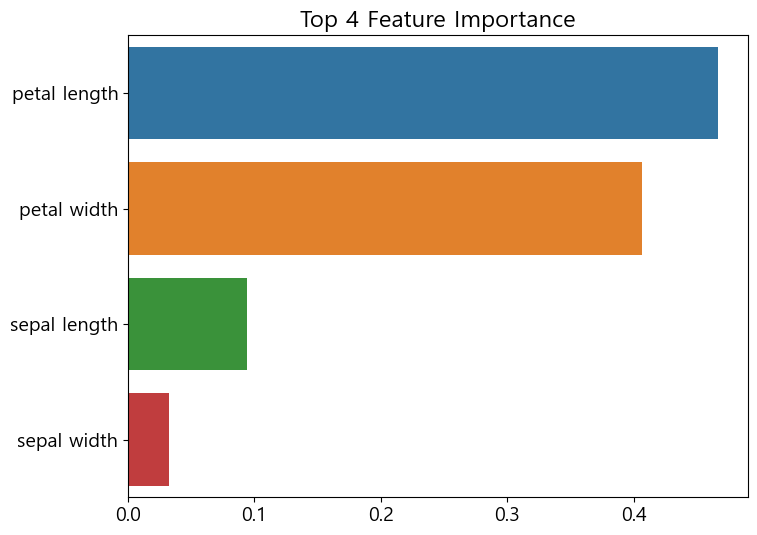

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_train.columns)
feature_top4 = feature_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8, 6))
plt.title('Top 4 Feature Importance')

sns.barplot(x=feature_top4, y=feature_top4.index)

plt.show()